<a href="https://colab.research.google.com/github/Patrickboules/ramadan-desserts-survey-analysis/blob/main/Ramadan_Desserts_DE211_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import kruskal
from scipy.stats import chi2_contingency,chi2
!pip install squarify
import squarify

In [37]:
df = pd.read_csv( "https://raw.githubusercontent.com/Patrickboules/ramadan-desserts-survey-analysis/main/Ramadan_Desserts.csv")

#**Cleaning Data**



In [38]:
df.head()

,Previous Order,Pricing,Rating,Best Place,Most Desired
0,BreadFast,Fairly Priced,5,BreadFast,Fati's
1,Crème,Over Priced,5,Crème,BreadFast
2,Sale Sucre,Fairly Priced,5,BreadFast,Voila
3,Fati's,Fairly Priced,3,BreadFast,NudeBakery
4,Tseppas,Over Priced,4,Tseppas,Fati's


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Previous Order  56 non-null     object
 1   Pricing         56 non-null     object
 2   Rating          56 non-null     int64 
 3   Best Place      55 non-null     object
 4   Most Desired    56 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.3+ KB


In [40]:
df = df.dropna()

In [41]:
df['Previous Order'].unique()

array(['BreadFast', 'Crème ', 'Sale Sucre', "Fati's", 'Tseppas', 'Blabn ',
       'Sultana', 'Étoile ', 'Blabn', 'Tortina', 'Sedra',
       'Mandarine koueider', 'Elabd', 'NudeBakery', 'Voila'], dtype=object)

In [42]:
prev = df['Previous Order'].values

In [43]:
df['Previous Order'] = np.array([item.strip() for item in prev])

In [44]:
df['Pricing'].value_counts()

,count
Pricing,
Fairly Priced,37
Over Priced,17
Under Priced,1


In [45]:
df = df[df['Pricing'] != 'Under Priced']

In [46]:
df['Pricing'].value_counts()

,count
Pricing,
Fairly Priced,37
Over Priced,17


#**Visualization**

<ipython-input-31-c4183e4e5099>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


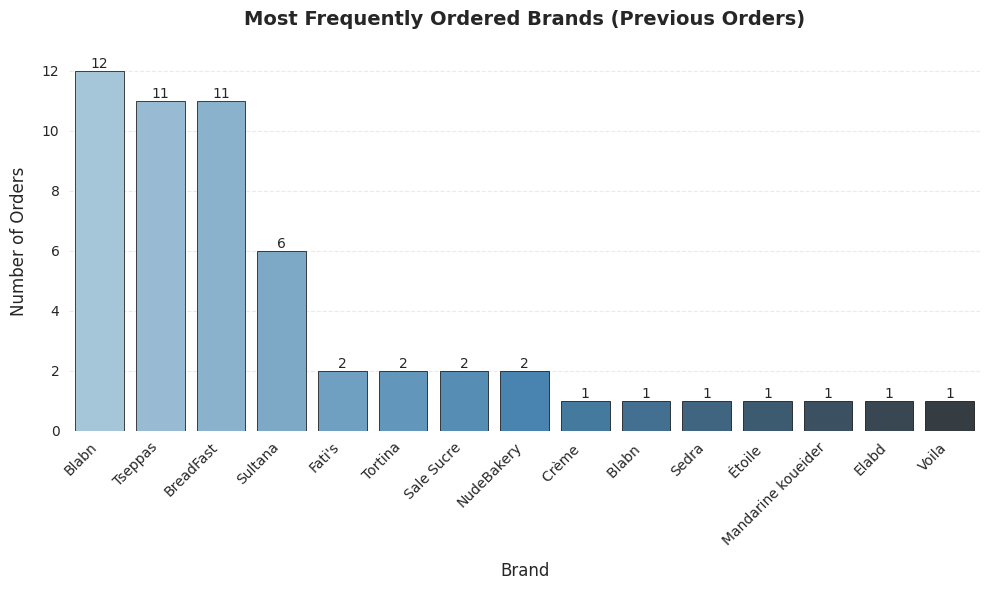

In [31]:
previous_order_counts = df['Previous Order'].value_counts().sort_values(ascending=False)

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot with improved aesthetics
ax = sns.barplot(
    x=previous_order_counts.index,
    y=previous_order_counts.values,
    palette="Blues_d",
    edgecolor="black",
    linewidth=0.5
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.title(
    'Most Frequently Ordered Brands (Previous Orders)',
    fontsize=14,
    pad=20,
    fontweight='bold'
)
plt.xlabel('Brand', fontsize=12, labelpad=10)
plt.ylabel('Number of Orders', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right')

sns.despine(left=True, bottom=True)

ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()

plt.show()

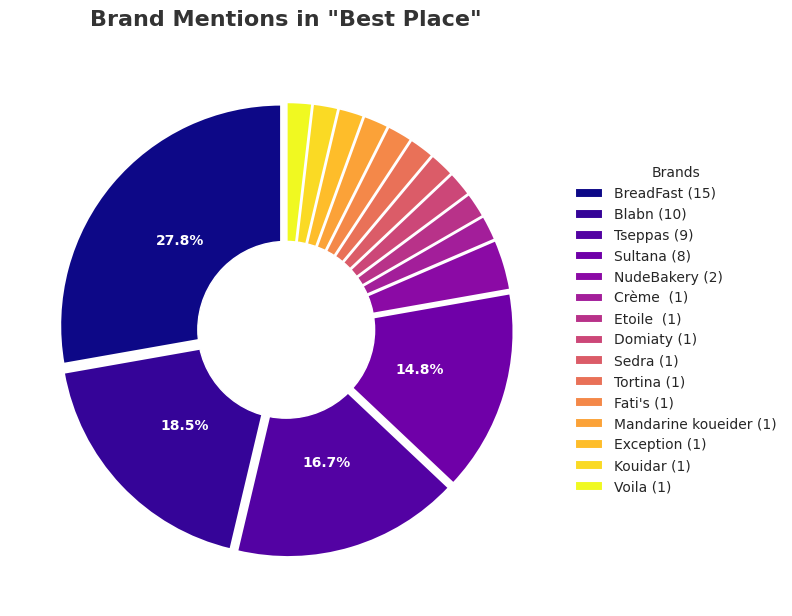

In [32]:
best_place_counts = df['Best Place'].value_counts()

# Filter small slices (optional)
min_threshold = 1
filtered_counts = best_place_counts[best_place_counts >= min_threshold]
others = best_place_counts[best_place_counts < min_threshold].sum()
if others > 0:
    filtered_counts['Others'] = others

plt.figure(figsize=(8, 8))
colors = plt.cm.plasma(np.linspace(0, 1, len(filtered_counts)))
explode = [0.03] * len(filtered_counts)

# Plot pie with white edges
wedges, texts, autotexts = plt.pie(
    filtered_counts,
    labels=None,
    autopct=lambda p: f'{p:.1f}%' if p >= 5 else '',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'white'}
)

# Add legend with counts
plt.legend(
    wedges,
    [f"{label} ({count})" for label, count in zip(filtered_counts.index, filtered_counts)],
    title="Brands",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# Add donut hole
plt.gca().add_artist(plt.Circle((0, 0), 0.4, fc='white'))

# Title and styling
plt.title(
    'Brand Mentions in "Best Place"',
    fontsize=16,
    pad=20,
    fontweight='bold',
    color='#333333'
)
plt.tight_layout()
plt.show()

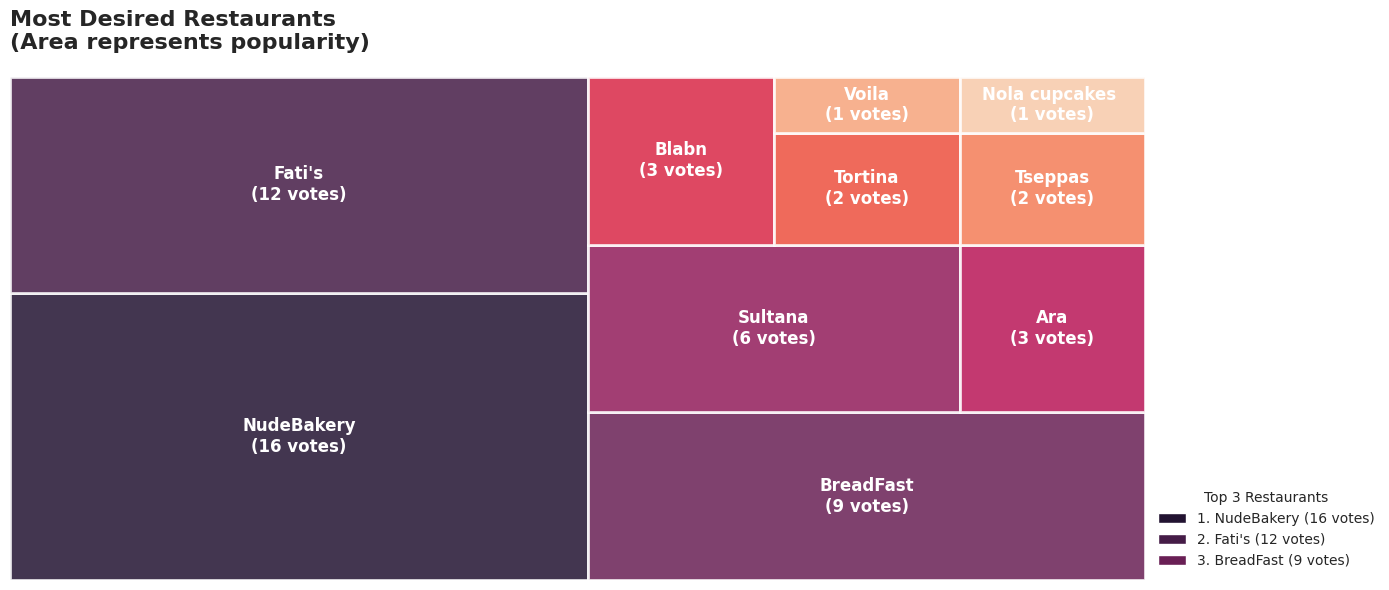

In [33]:
desired_counts = df["Most Desired"].value_counts()

colors = sns.color_palette("viridis", len(desired_counts))
colors = sns.color_palette("rocket", len(desired_counts))

# Treemap with annotations
plt.figure(figsize=(14, 6))
squarify.plot(
    sizes=desired_counts.values,
    label=[f"{label}\n({count} votes)" for label, count in zip(desired_counts.index, desired_counts.values)],
    color=colors,
    alpha=0.85,
    edgecolor="white",
    linewidth=2,
    text_kwargs={
        "fontsize": 12,
        "fontweight": "bold",
        "color": "white",
        "wrap": True,
    }
)

# Customization
plt.title(
    "Most Desired Restaurants\n(Area represents popularity)",
    fontsize=16,
    fontweight="bold",
    pad=20,
    loc="left"
)
plt.axis("off")

# Add legend for top performers
top_3 = desired_counts.nlargest(3)
legend_labels = [f"{i+1}. {name} ({count} votes)" for i, (name, count) in enumerate(top_3.items())]
plt.legend(
    handles=[plt.Rectangle((0,0),1,1, fc=colors[i]) for i in range(len(top_3))],
    labels=legend_labels,
    title="Top 3 Restaurants",
    loc="lower left",
    bbox_to_anchor=(1, 0),
    frameon=False
)

plt.tight_layout()
plt.show()

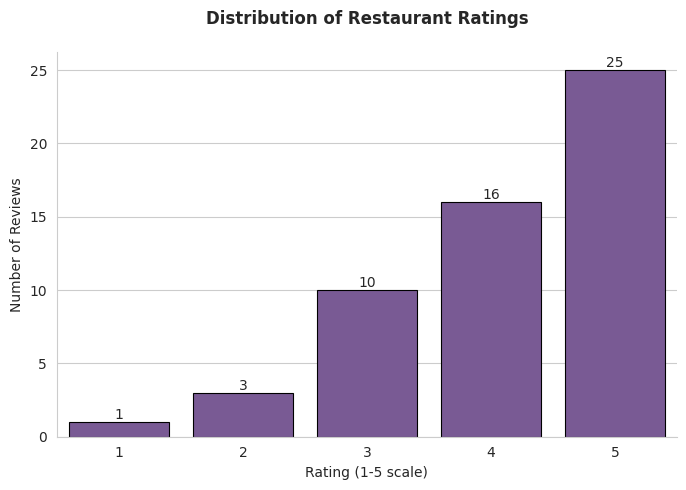

In [34]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Rating', data=df,
                  color='#7a519d',  # Purple shade
                  edgecolor='black',
                  linewidth=0.8,
                  order=sorted(df['Rating'].unique()))

# Add exact counts on top
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Restaurant Ratings', pad=20, fontweight='bold')
plt.xlabel('Rating (1-5 scale)')
plt.ylabel('Number of Reviews')
sns.despine()
plt.show()

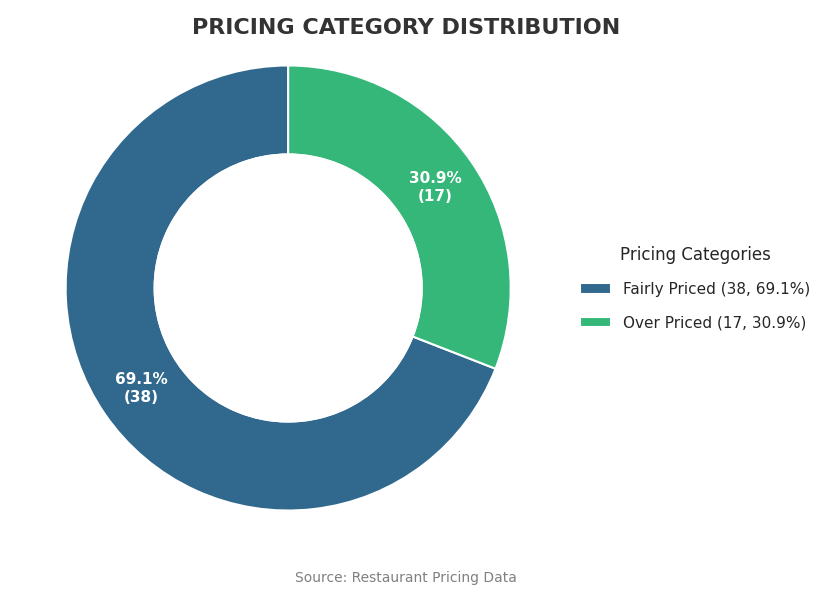

In [35]:
pricing_counts = df['Pricing'].value_counts()
total = sum(pricing_counts)

palette = sns.color_palette("viridis", len(pricing_counts))

plt.figure(figsize=(8, 6), dpi=100, layout='constrained')
plt.axis('off')

# Create pie chart
wedges, texts, autotexts = plt.pie(
    pricing_counts,
    labels=None,
    autopct=lambda p: f'{p:.1f}%\n({int(round(p*total/100))})',
    startangle=90,
    colors=palette,
    wedgeprops={
        'linewidth': 1.5,
        'edgecolor': 'white',
        'width': 0.4  # Donut style
    },
    pctdistance=0.8,
    textprops={
        'fontsize': 11,
        'fontweight': 'bold',
        'color': 'white',
        'ha': 'center',
        'va': 'center'
    }
)

centre_circle = plt.Circle((0,0), 0.6, fc='white', edgecolor='white', linewidth=1.5)
plt.gca().add_artist(centre_circle)

# Add legend
legend_labels = [f"{label} ({count}, {count/total:.1%})"
                for label, count in zip(pricing_counts.index, pricing_counts)]

plt.legend(
    wedges,
    legend_labels,
    title="Pricing Categories",
    title_fontsize=12,
    fontsize=11,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    frameon=False,
    labelspacing=1.2
)

# Add titles
plt.suptitle(
    'PRICING CATEGORY DISTRIBUTION',
    y=0.95,
    fontsize=16,
    fontweight='bold',
    color='#333333'
)

# Add source footnote
plt.figtext(
    0.5, 0.01,
    "Source: Restaurant Pricing Data",
    ha="center",
    fontsize=10,
    color="gray"
)

plt.show()

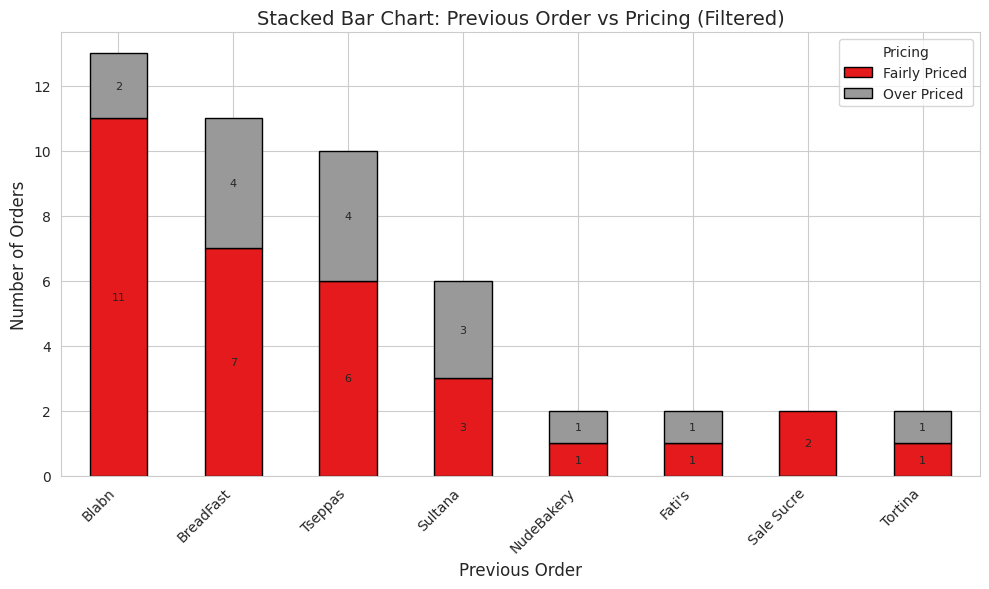

In [47]:
ct = pd.crosstab(df['Previous Order'], df['Pricing'])

# Filter out categories with total count <= 1
ct_filtered = ct[ct.sum(axis=1) > 1]

ct_filtered = ct_filtered.loc[ct_filtered.sum(axis=1).sort_values(ascending=False).index]

ax = ct_filtered.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set1',
    edgecolor='black'
)

# Title and labels
plt.title('Stacked Bar Chart: Previous Order vs Pricing (Filtered)', fontsize=14)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Previous Order', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels (skip zeros)
for container in ax.containers:
    labels = [f'{int(v)}' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

plt.tight_layout()
plt.show()


#**Hypothesis Testing**


##Test #1
*Pricing* VS *Rating*

Null Hypothesis $H_0$ $ \Rightarrow $ Rating is independent of Pricing

Alternating Hypothesis  $H_1$ $ \Rightarrow $ Rating is affected by Pricing

In [49]:
fairly = df[df['Pricing'] == 'Fairly Priced']['Rating']
over = df[df['Pricing'] == 'Over Priced']['Rating']
stat, p_value = kruskal(fairly, over)

if p_value < 0.05:
    print("✅ Significant: Rating depends on Pricing (reject H0)")
else:
    print("❌ Not Significant: No evidence of association (fail to reject H0)")

✅ Significant: Rating depends on Pricing (reject H0)


<ipython-input-54-d2fe266a0d06>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x='Pricing', y='Rating', data=df,


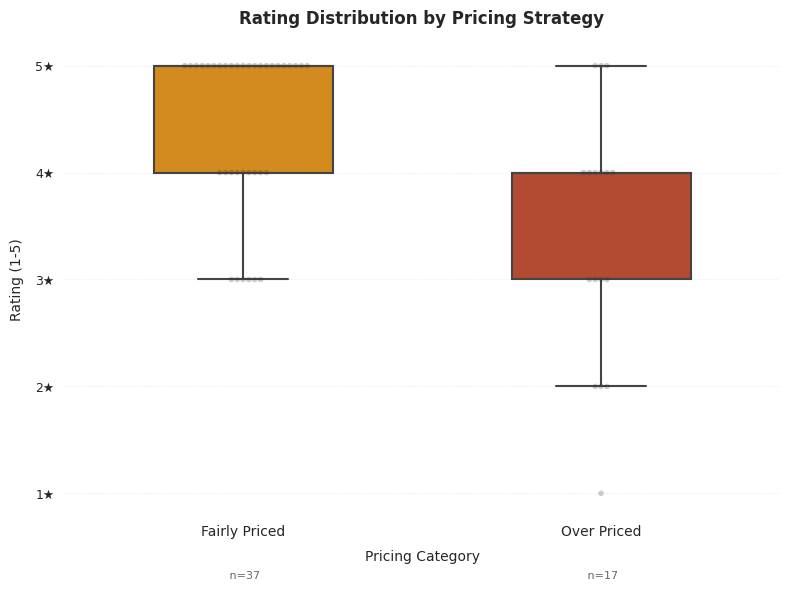

In [54]:
plt.figure(figsize=(8, 6))

palette = {
    'Fairly Priced': '#F18F01', # Warm orange
    'Over Priced': '#C73E1D'    # Rich red
}

# Create boxplot with enhanced styling
box = sns.boxplot(x='Pricing', y='Rating', data=df,
                 order=[ 'Fairly Priced', 'Over Priced'],
                 palette=palette.values(),
                 width=0.5,
                 linewidth=1.5,
                 fliersize=0)

# Add swarmplot with improved settings
swarm = sns.swarmplot(x='Pricing', y='Rating', data=df,
                     order=[ 'Fairly Priced', 'Over Priced'],
                     color='#333333',
                     size=4,  # Reduced from 6
                     alpha=0.25,
                     edgecolor='none',
                     dodge=True)

plt.title('Rating Distribution by Pricing Strategy',
         fontsize=12, pad=15, weight='bold')
plt.xlabel('Pricing Category', fontsize=10, labelpad=8)
plt.ylabel('Rating (1-5)', fontsize=10, labelpad=8)

plt.ylim(0.8, 5.2)
plt.yticks(range(1,6), labels=[f'{i}★' for i in range(1,6)], fontsize=9)

plt.grid(axis='y', linestyle=':', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.gca().spines['left'].set_color('#CCCCCC')
plt.gca().spines['bottom'].set_color('#CCCCCC')

for i, category in enumerate(['Fairly Priced', 'Over Priced']):
    n = len(df[df['Pricing'] == category])
    plt.text(i, 0.5, f'\n\n n={n}',
             ha='center', va='top',
             fontsize=8,  # Smaller font
             color='#666666')

plt.tight_layout()
plt.show()

##Test #2
*Pricing* VS *Rating*

Null Hypothesis $H_0$ $ \Rightarrow $ Rating is independent of Pricing

Alternating Hypothesis  $H_1$ $ \Rightarrow $ Rating is affected by Pricing